In [1]:
from utils.utils import *

In [2]:
# load config file from "config/config.json"
config = load_config("config/config.json")
config

{'data': 'diabetes2_csv.csv',
 'drop': ['RAND()'],
 'target': 'Outcome',
 'test_size': 0.33}

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


# load dataset 
data_file = os.path.join("data", config["data"])    # dataset file (default: ./data/diabetes2_csv.csv)
X, y = load_dataset(data_file, config["drop"], config["target"])    # load dataset using pandas


# then preprocess and split into training and testing
X_prep = preprocess_data(X)  # then preprocess the loaded dataset
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=config["test_size"])  # split dataset


pd.concat([X, y], axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,189,110,31,0,28.5,0.680,37,0
1,1,84,64,23,115,36.9,0.471,28,0
2,8,95,72,0,0,36.8,0.485,57,0
3,5,73,60,0,0,26.8,0.268,27,0
4,7,187,50,33,392,33.9,0.826,34,1
...,...,...,...,...,...,...,...,...,...
763,5,115,76,0,0,31.2,0.343,44,1
764,4,117,62,12,0,29.7,0.380,30,1
765,5,104,74,0,0,28.8,0.153,48,0
766,5,114,74,0,0,24.9,0.744,57,0


In [4]:
from sklearn.linear_model import LogisticRegression


# prepare the ml model using logistic regression
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

# predict the test dataset
y_pred = model.predict(X_test)

In [5]:
# [Optional] you can skip this if you don't need to save/load it

# save model after training
save_dir = save_model(model)
print("[*] model has been saved at ->", save_dir)


# load the saved model again to recheck that saving is completed
loaded_model = load_model(save_dir)

[*] model has been saved at -> saved_model\10_02_2020-17_05_45.pickle


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# evaluate the score included
#   * Confusion matrix -> (true_neg, false_pos, false_neg, true_pos)
#   * Precision score
#   * Recall score
#   * F1 score
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, y_pred).ravel()
print("[*] from testing data", len(y_test), "rows.")

print("")
print("True Positive:", true_pos, "\t", "True Negative:", true_neg)
print("False Positive:", false_pos, "\t", "False Negative:", false_neg)

print("")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
print("F1 score: {:.4f}".format(f1_score(y_test, y_pred)))

[*] from testing data 254 rows.

True Positive: 43 	 True Negative: 137
False Positive: 19 	 False Negative: 55

Accuracy: 0.7087
Precision: 0.6935
Recall: 0.4388
F1 score: 0.5375


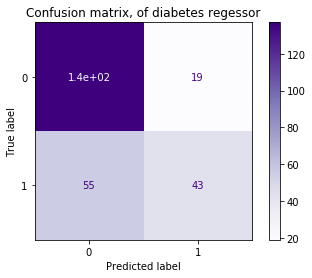

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


# Plot a confusion matrix
title = "Confusion matrix, of diabetes regessor"
disp = plot_confusion_matrix(
    model, 
    X_test, y_test,
    display_labels=[0,1],
    cmap=plt.cm.Purples,
)
disp.ax_.set_title(title)
plt.show()